
# 📊 Proyecto de Bot de Trading de Bitcoin

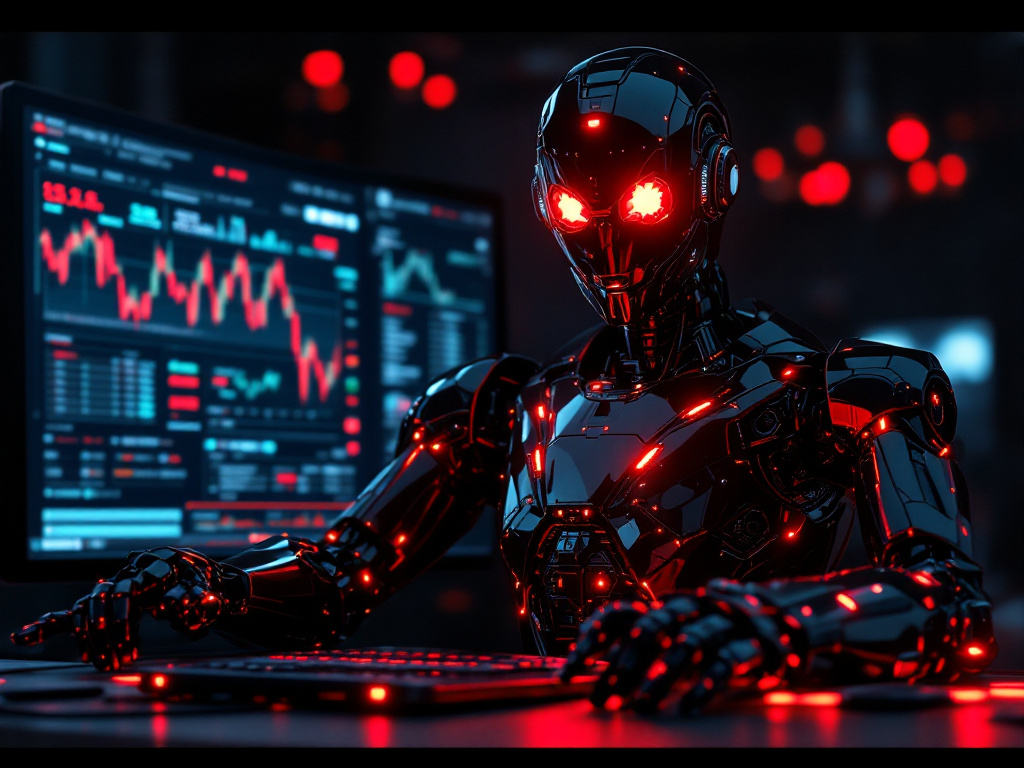

## 📈 Objetivo del Proyecto
Este proyecto tiene como objetivo crear un bot de trading automatizado que analice el comportamiento del precio de Bitcoin en tiempo real y tome decisiones de compra, venta o mantener, basándose en medias móviles simples y tendencias de mercado.

## ❓ Preguntas Clave
- 🔍 **Análisis Inicial**: ¿Cómo se comporta el precio de Bitcoin en intervalos de 5 minutos?
- 📊 **Tendencias**: ¿Cómo extraemos y analizamos las tendencias del precio de Bitcoin desde una fuente externa como CoinMarketCap?
- 🛠️ **Medias Móviles**: ¿Qué criterios utilizamos para decidir si comprar, vender o mantener en función de las medias móviles y la tendencia?
- 🔄 **Automatización**: ¿Cómo implementamos un ciclo continuo que toma decisiones cada 5 minutos?

## 🚀 Configuración del Ambiente
Asegúrate de tener las siguientes bibliotecas instaladas para ejecutar el proyecto:

```bash
pip install yfinance beautifulsoup4  matplotlib seaborn pandas numpy
```

## 📥 Obtención y Tratamiento de Datos
### 📂 Importación de Datos
- Los datos históricos del precio de Bitcoin (BTC-USD) se obtienen a través de la API de yFinance.
- Los precios actuales y la tendencia de mercado se extraen de CoinMarketCap utilizando BeautifulSoup.

### 🧹 Limpieza de Datos
Se realizan las siguientes operaciones para preparar los datos:
- 📋 **Eliminación de duplicados**: Eliminamos registros con índices duplicados.
- 🧽 **Relleno de valores nulos**: Rellenamos los valores faltantes en la columna de precios con el último valor disponible.
- 📉 **Manejo de outliers**: Aplicamos el método del rango intercuartílico (IQR) para eliminar valores atípicos.

## 📊 Cálculo de Medias Móviles
Se calculan dos medias móviles:
- **SMA corto (10 periodos)**: Representa la tendencia a corto plazo.
- **SMA largo (50 periodos)**: Representa la tendencia a largo plazo.

## 🤖 Toma de Decisiones
El bot toma decisiones basadas en las siguientes reglas:
- **Comprar**: Si la SMA corta supera la SMA larga y la tendencia es alcista.
- **Vender**: Si la SMA corta está por debajo de la SMA larga y la tendencia es bajista.
- **Mantener**: Si no se cumplen las condiciones anteriores.

## 🔄 Ciclo Automatizado
El bot se ejecuta en un loop infinito, tomando decisiones cada 5 minutos, descargando nuevos datos, limpiando los datos y calculando las medias móviles para decidir la acción a tomar.

## 📊 Visualización de Resultados
Se pueden generar gráficos para visualizar el comportamiento de las medias móviles y el precio de Bitcoin utilizando bibliotecas como Matplotlib y Plotly.

## 📝 Conclusiones
Este bot proporciona una solución automatizada para el análisis y toma de decisiones de trading de Bitcoin, basado en indicadores técnicos simples y datos extraídos en tiempo real. Es un excelente punto de partida para quienes desean experimentar con bots de trading y estrategias basadas en medias móviles.


#**1.Configuración del ambiente**

global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, etc.

El resultado debería ser las bibliotecas y sus versiones que tenemos instaladas en nuestro Ambiente, si tienes algún error revisa tu configuración, talvez falte instalar alguna biblioteca.

In [1]:
# Validamos que las liberias que necesitamos esten disponibles y no tengamos errores en nuestro ambiente
# Verificar la versión de Python
!python -V
# Verificar la versión de pandas
!pip show Pandas | grep 'Name\|Version'
# Verificar la versión de numpy
!pip show Numpy | grep 'Name\|Version'
# Verificar la versión de matplotlib
!pip show matplotlib | grep 'Name\|Version'
# Verificar la versión de plotly
!pip show plotly | grep 'Name\|Version'


Python 3.11.11
Name: pandas
Version: 2.2.2
Name: numpy
Version: 1.26.4
Name: lapack-lite
Name: tempita
Name: dragon4
Name: libdivide
Name: Meson
Name: spin
Name: OpenBLAS
Name: LAPACK
Name: GCC runtime library
Version 3.1, 31 March 2009
                       Version 3, 29 June 2007
  5. Conveying Modified Source Versions.
  14. Revised Versions of this License.
Name: libquadmath
Name: matplotlib
Version: 3.10.0
Name: plotly
Version: 5.24.1


In [2]:
# Definir variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
df_bitcoin = None
precio_actual = 0
tendencia = ""
media_bitcoin = 0.0
algoritmo_decision = ""

#**2.Obtención de datos**

Utilizaremos la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, extraeremos  el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico lo guardaremos en el dataframe df_bitcoin.

Crearemos una funcion extraer_tendencias(), dentro de ella,

Utilizando la biblioteca BeautifulSoup deberás realizaremos Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio lo convertiremos  a float y lo guardamos en la variable llamada precio_actual. Ahora, en la variable tendencia guardaremos el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.

In [3]:
# Importar librerías de manipulación de datos
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas del DataFrame
pd.set_option('display.expand_frame_repr', False)  # Evitar que el DataFrame se divida en varias líneas si tiene muchas columnas
import warnings
%matplotlib inline
from io import StringIO

#Libreria para graficos interactivos
import plotly.express as px
import plotly.graph_objects as go

# Importar librerías para manejo de tiempo y fecha
import time
from datetime import datetime, timedelta

# Importar librerías de scraping
import requests
from bs4 import BeautifulSoup

# Importar librerías de visualización
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (5, 5))  # Establecer el tamaño predeterminado de las figuras a 5x5 pulgadas

# Importar librerías específicas de entorno Jupyter
from IPython.display import clear_output

# Importar librería para obtención de datos financieros
import yfinance as yf

## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
import missingno as msno

# Variables globales
global df_bitcoin, df_bitcoin_limpio, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [4]:
def importar_base_bitcoin():
    """
    Importa y procesa los datos históricos de Bitcoin de los últimos 7 días.

    Esta función descarga los datos de Bitcoin (BTC-USD) de los últimos 7 días con un intervalo de 5 minutos
    utilizando la biblioteca yfinance. Los datos se almacenan en un DataFrame global llamado df_bitcoin.

    Variables globales:
    df_bitcoin (pandas.DataFrame): DataFrame que contiene los datos históricos de Bitcoin.
    """
    global df_bitcoin
    import datetime

    # Símbolo de Bitcoin
    bitcoin = "BTC-USD"


    # Calcular las fechas para obtener los datos de los últimos 7 días
    fecha_final = datetime.datetime.now()
    fecha_inicial = fecha_final - datetime.timedelta(days=7)

    # Descargar los datos de Bitcoin con un intervalo de 5 minutos
    datos = yf.download(bitcoin, start=fecha_inicial, end=fecha_final, interval="1h")

    # Convertir los datos descargados a un DataFrame
    df_bitcoin = pd.DataFrame(datos)

# Llamar a la función para importar los datos de Bitcoin
importar_base_bitcoin()

# Mostrar las primeras filas del DataFrame para verificar los datos importados
print("************************************************************")
print("Datos Historicos del Bitcoin.")
print("************************************************************")
df_bitcoin.head()


[*********************100%***********************]  1 of 1 completed

************************************************************
Datos Historicos del Bitcoin.
************************************************************


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-01-13 21:00:00+00:00,94160.921875,94419.421875,93555.406250,93562.867188,0
2025-01-13 22:00:00+00:00,94269.101562,94611.273438,94151.328125,94151.328125,778649600
2025-01-13 23:00:00+00:00,94572.382812,94572.382812,94214.281250,94396.367188,0
2025-01-14 00:00:00+00:00,94445.851562,94797.039062,94330.820312,94510.078125,0
2025-01-14 01:00:00+00:00,94783.367188,94986.164062,94507.414062,94507.414062,0


Ahora vamos  guardar la informacion en el historico en el dataframe df_bitcoin

Este código creará un DataFrame llamado df_bitcoin con el histórico de precios del Bitcoin en intervalos de 5 minutos para los últimos 7 días.


In [5]:
def extraer_tendencias():
    """
    Extrae tendencias y toma decisiones de trading basadas en el análisis de precios de Bitcoin.

    Esta función crea un objeto Ticker para BTC-USD, obtiene el histórico de precios de los últimos 7 días
    en intervalos de 5 minutos, calcula el precio actual, la media del precio de cierre y establece una
    tendencia simple basada en la comparación de precios. Finalmente, define un algoritmo de decisión
    basado en la tendencia y el precio actual.

    Variables globales:
    df_bitcoin (pandas.DataFrame): DataFrame que contiene los datos históricos de Bitcoin.
    precio_actual (float): Precio actual de Bitcoin.
    tendencia (str): Tendencia del mercado ("Alcista" o "Bajista").
    media_bitcoin (float): Media del precio de cierre de Bitcoin.
    algoritmo_decision (str): Decisión del algoritmo ("Comprar", "Vender" o "Esperar").
    """
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Crear un objeto de la clase Ticker para BTC-USD
    bitcoin = yf.Ticker("BTC-USD")

    # Obtener el histórico de precios de los últimos 7 días en intervalos de 5 minutos
    df_bitcoin = bitcoin.history(period="1mo", interval="5m")

    # Calcular el precio actual como el último precio en el DataFrame
    precio_actual = df_bitcoin['Close'].iloc[-1].round(2)

    # Calcular la media del precio de cierre
    media_bitcoin = df_bitcoin['Close'].mean().round(2)

    # Verificar si el DataFrame no está vacío
    if df_bitcoin.empty:
        raise ValueError("No se pudieron obtener datos de Bitcoin. El DataFrame está vacío.")

    # Establecer una tendencia simple basada en la comparación de precios
    if precio_actual >= media_bitcoin:
        tendencia = "Alcista"
    else:
        tendencia = "Bajista"

    # Definir un algoritmo de decisión
    if precio_actual > media_bitcoin and tendencia =='Bajista':
        algoritmo_decision = "Comprar"
    elif precio_actual < media_bitcoin and tendencia =='Alcista':
         algoritmo_decision = "Vender"
    else:
         algoritmo_decision='Esperar'

# Llama a la función para extraer las tendencias
extraer_tendencias()

# Imprime las variables globales
print("************************************************************")
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)
print("************************************************************")

************************************************************
Precio Actual: 103731.11
Tendencia: Alcista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Esperar
************************************************************


## **Web scraping**
Para realizar web scraping en la página https://coinmarketcap.com/ y extraer el precio actual del Bitcoin en dólares (USD) y la variación de su precio en la última hora (1h %), necesitamos utilizar la biblioteca BeautifulSoup junto con la biblioteca requests.

In [6]:
def extraer_tendencias():
    """
    Extrae tendencias y toma decisiones de trading basadas en el análisis de precios de Bitcoin.

    Esta función utiliza la biblioteca yfinance para obtener datos históricos de Bitcoin y BeautifulSoup
    para scrapear el precio actual y la variación de precio de CoinMarketCap. Luego, calcula la media del
    precio de cierre y establece una tendencia simple basada en la comparación de precios. Finalmente,
    definimos un algoritmo de decisión basado en la tendencia y el precio actual.

    Variables globales:
    df_bitcoin (pandas.DataFrame): DataFrame que contiene los datos históricos de Bitcoin.
    precio_actual (float): Precio actual de Bitcoin.
    tendencia (str): Tendencia del mercado ("Alcista" o "Bajista").
    media_bitcoin (float): Media del precio de cierre de Bitcoin.
    algoritmo_decision (str): Decisión del algoritmo ("Comprar", "Vender" o "Esperar").
    """

    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    from bs4 import BeautifulSoup
    import requests
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/118.0'}
# URL de la página de CoinMarketCap
url = "https://coinmarketcap.com/"
# Realizar una solicitud GET a la URL
response = requests.get(url, headers=headers)
# Parsear el contenido de la página con BeautifulSoup
soup = BeautifulSoup(response.content, features = 'lxml')



# Buscar el elemento que contiene el precio actual del Bitcoin en USD
bitcoin_price_element = soup.find('div', {'class': ['sc-b3fc6b7-0 dzgUIj rise','sc-b3fc6b7-0 dzgUIj','sc-b3fc6b7-0 dzgUIj fall']})
bitcoin_1h_change_element = soup.find('span', {'class': ['sc-a59753b0-0 ivvJzO']})


span_element = bitcoin_price_element.find('span')
span_element2 = bitcoin_1h_change_element.find('span')

variacion = span_element2.get('class')

precio = span_element.text.strip()
precio_actual = float(precio.replace('$', '').replace(',', ''))


variacion = str(variacion)

# Llama a la función para extraer las tendencias

extraer_tendencias()

if variacion == "['icon-Caret-up']":
    tendencia = "Alcista"
elif variacion == "['icon-Caret-down']":
    tendencia = "Bajista"
else:
    tendencia = ""


# Definir un algoritmo de decisión
    if precio_actual > media_bitcoin and tendencia == "Bajista":
        algoritmo_decision = "Comprar"
    elif precio_actual < media_bitcoin and tendencia == "Alcista":
        algoritmo_decision = "Vender"
    else:
        algoritmo_decision = "Esperar"

# Imprime las variables globales
print("************************************************************")
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)
print("************************************************************")


************************************************************
Precio Actual: 103651.92
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Esperar
************************************************************


# 3. Limpieza de datos

In [7]:
df_bitcoin_limpio = df_bitcoin.copy()

In [8]:
df_bitcoin_limpio.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-12-20 21:35:00+00:00,96311.054688,96311.054688,96206.320312,96215.453125,0,0.0,0.0
2024-12-20 21:40:00+00:00,96292.382812,96383.593750,96268.296875,96383.593750,0,0.0,0.0
2024-12-20 21:45:00+00:00,96375.054688,96375.054688,96333.242188,96333.242188,0,0.0,0.0
2024-12-20 21:50:00+00:00,96324.765625,96542.460938,96280.781250,96542.460938,0,0.0,0.0
2024-12-20 21:55:00+00:00,96524.195312,96542.976562,96475.664062,96542.804688,0,0.0,0.0


In [9]:
# A. ¿Cuántas características tiene el conjunto de datos?
num_features = df_bitcoin_limpio.shape[1]
print("************************************************************")
print(f"El conjunto de datos tiene {num_features} características.")
print("************************************************************")

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df_bitcoin_limpio.head()

************************************************************
El conjunto de datos tiene 7 características.
************************************************************


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-12-20 21:35:00+00:00,96311.054688,96311.054688,96206.320312,96215.453125,0,0.0,0.0
2024-12-20 21:40:00+00:00,96292.382812,96383.593750,96268.296875,96383.593750,0,0.0,0.0
2024-12-20 21:45:00+00:00,96375.054688,96375.054688,96333.242188,96333.242188,0,0.0,0.0
2024-12-20 21:50:00+00:00,96324.765625,96542.460938,96280.781250,96542.460938,0,0.0,0.0
2024-12-20 21:55:00+00:00,96524.195312,96542.976562,96475.664062,96542.804688,0,0.0,0.0


In [10]:
# B. ¿Cuántas características son numéricas, textuales, categóricas o booleanas?
numerical_features = df_bitcoin_limpio.select_dtypes(include=['int64', 'float64']).columns
textual_features = df_bitcoin_limpio.select_dtypes(include=['object']).columns
categorical_features = df_bitcoin_limpio.select_dtypes(include=['category']).columns
boolean_features = df_bitcoin_limpio.select_dtypes(include=['bool']).columns

print("************************************************************")
print(f"Número de características numéricas: {len(numerical_features)}")
print(f"Número de características textuales: {len(textual_features)}")
print(f"Número de características categóricas: {len(categorical_features)}")
print(f"Número de características booleanas: {len(boolean_features)}")
print("************************************************************")

# ¿Hay alguna dependencia estadística entre las características?
# Calcular la matriz de correlación para las características numéricas
correlation_matrix = df_bitcoin_limpio[numerical_features].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación para las características numéricas:")
print(correlation_matrix)



************************************************************
Número de características numéricas: 7
Número de características textuales: 0
Número de características categóricas: 0
Número de características booleanas: 0
************************************************************
Matriz de correlación para las características numéricas:
                  Open      High       Low     Close    Volume  Dividends  Stock Splits
Open          1.000000  0.999669  0.999685  0.999279  0.020104        NaN           NaN
High          0.999669  1.000000  0.999506  0.999691  0.023190        NaN           NaN
Low           0.999685  0.999506  1.000000  0.999671  0.018307        NaN           NaN
Close         0.999279  0.999691  0.999671  1.000000  0.020949        NaN           NaN
Volume        0.020104  0.023190  0.018307  0.020949  1.000000        NaN           NaN
Dividends          NaN       NaN       NaN       NaN       NaN        NaN           NaN
Stock Splits       NaN       NaN       NaN    

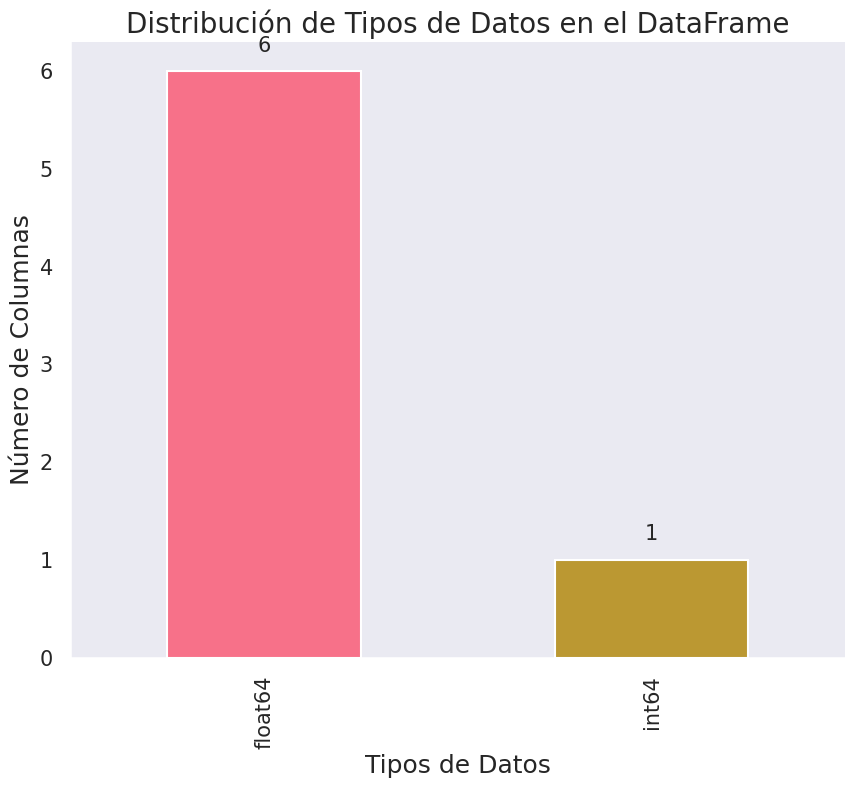

In [11]:
import seaborn as sns
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_bitcoin_limpio.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [12]:
#Información de los datos
print("************************************************************")
print("Número de filas: ",df_bitcoin_limpio.shape[0])
print("Número de Columnas:",df_bitcoin_limpio.shape[1])
print("Datos Duplicados",df_bitcoin_limpio.duplicated().sum())
print("Variables Categóricas: ",df_bitcoin_limpio.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_bitcoin_limpio.select_dtypes(exclude='object').shape[1])
print("************************************************************")

************************************************************
Número de filas:  8905
Número de Columnas: 7
Datos Duplicados 0
Variables Categóricas:  0
Variables Numéricas:  7
************************************************************


In [13]:
#datos nulos por columna
df_bitcoin_limpio.isnull().sum().sort_values(ascending=False)

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


Text(0, 0.5, 'Filas')

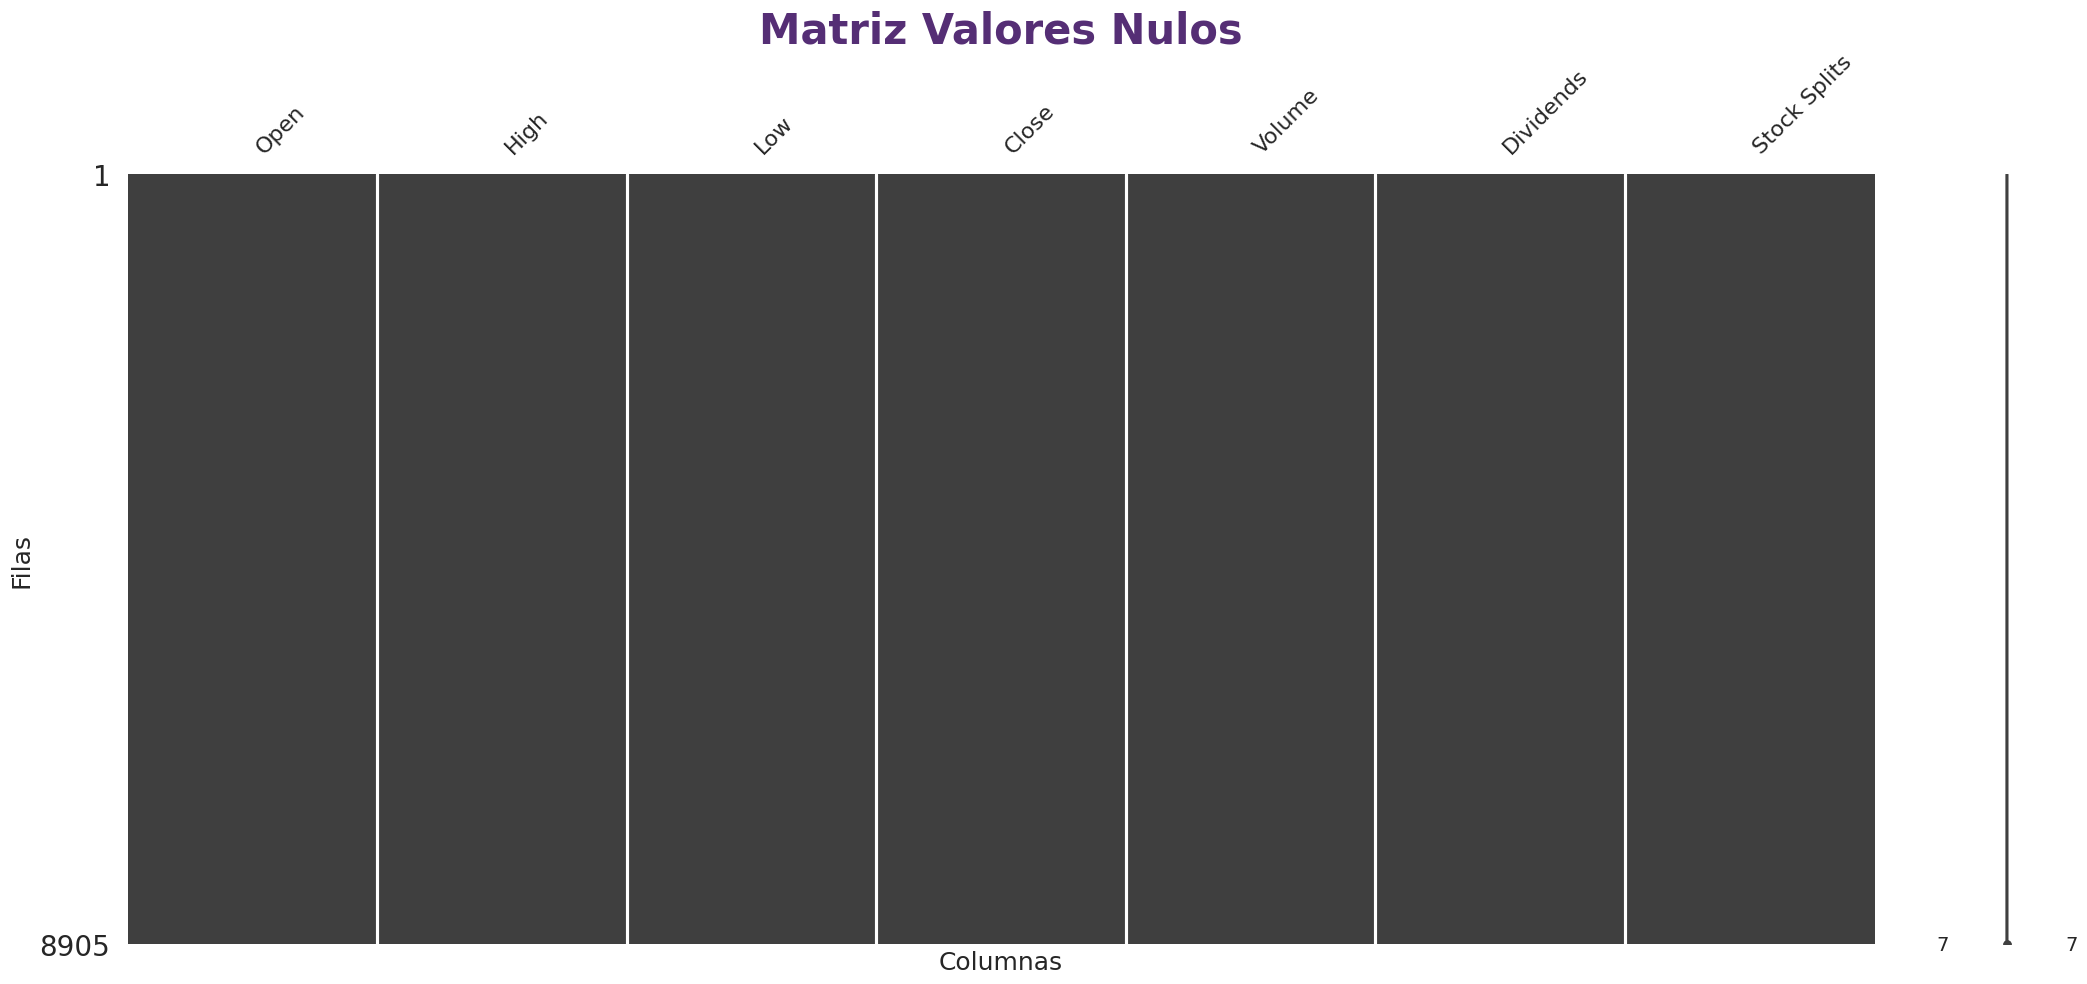

In [14]:
#Visualización con seaborn de los valores nulos
msno.matrix(df_bitcoin_limpio)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [15]:
#Identificar los valores unicos por columna
df_bitcoin_limpio.nunique()

,0
Open,8874
High,8870
Low,8860
Close,8868
Volume,4184
Dividends,1
Stock Splits,1


In [16]:
df_bitcoin_limpio.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,8905.000000,8905.000000,8905.000000,8905.000000,8.905000e+03,8905.0,8905.0
mean,97022.470271,97074.357213,96971.998750,97024.091521,5.874258e+07,0.0,0.0
std,3462.634628,3470.613049,3455.486318,3463.390256,4.489592e+08,0.0,0.0
min,89260.101562,90219.351562,89260.101562,90219.351562,0.000000e+00,0.0,0.0
25%,94406.804688,94444.156250,94373.406250,94412.101562,0.000000e+00,0.0,0.0
50%,96362.429688,96414.726562,96307.250000,96359.523438,0.000000e+00,0.0,0.0
75%,98525.773438,98573.593750,98487.882812,98524.265625,5.714739e+07,0.0,0.0
max,108899.929688,109110.390625,108710.578125,108896.531250,3.961247e+10,0.0,0.0


In [17]:
import plotly.express as px

def crear_boxplot_con_estadisticas(df_bitcoin):
    """
    Crea un gráfico de caja (boxplot) para los precios de cierre de Bitcoin e incluye anotaciones
    sobre los valores de los cuartiles, la mediana y el rango intercuartílico.

    Args:
    - df_bitcoin (DataFrame): DataFrame con los precios de Bitcoin (columna 'Close').
    """

    # Calcular los cuartiles y la mediana
    Q1 = df_bitcoin['Close'].quantile(0.25)
    Q3 = df_bitcoin['Close'].quantile(0.75)
    mediana = df_bitcoin['Close'].median()
    rango_intercuartil = Q3 - Q1

    # Creamos el boxplot con Plotly Express
    fig = px.box(df_bitcoin, y='Close', title='Boxplot de Precios de Cierre de Bitcoin')

    # Agregamos anotaciones para los cuartiles y la mediana
    fig.add_annotation(
        x=1.05, y=Q1, text=f'Q1: {Q1:.2f}', showarrow=False,
        font=dict(size=12, color='black'), bgcolor='white', borderpad=4
    )

    fig.add_annotation(
        x=1.05, y=Q3, text=f'Q3: {Q3:.2f}', showarrow=False,
        font=dict(size=12, color='black'), bgcolor='white', borderpad=4
    )

    fig.add_annotation(
        x=1.05, y=mediana, text=f'Mediana: {mediana:.2f}', showarrow=False,
        font=dict(size=12, color='black'), bgcolor='white', borderpad=4
    )

    # Agregamos un texto con el rango intercuartílico
    fig.add_annotation(
        x=1.05, y=(Q1 + Q3) / 2, text=f'Rango IQR: {rango_intercuartil:.2f}',
        showarrow=False, font=dict(size=12, color='black'), bgcolor='white', borderpad=4
    )

    # Establecemos el layout y mostrar el gráfico
    fig.update_layout(
        title='Boxplot de Precios de Cierre de Bitcoin con Estadísticas',
        xaxis_title='Precio de Cierre',
        yaxis_title='Valor',
        template='plotly_dark',  # Estilo de fondo oscuro
        showlegend=False,  # Ocultar la leyenda
        plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
        annotations=[dict(
            xref='paper', yref='y',
            x=1.05, y=Q1,
            text=f'Q1: {Q1:.2f}',
            showarrow=False,
            font=dict(size=12, color='black'),
            bgcolor='white',
            borderpad=4
        ), dict(
            xref='paper', yref='y',
            x=1.05, y=Q3,
            text=f'Q3: {Q3:.2f}',
            showarrow=False,
            font=dict(size=12, color='black'),
            bgcolor='white',
            borderpad=4
        ), dict(
            xref='paper', yref='y',
            x=1.05, y=mediana,
            text=f'Mediana: {mediana:.2f}',
            showarrow=False,
            font=dict(size=12, color='black'),
            bgcolor='white',
            borderpad=4
        ), dict(
            xref='paper', yref='y',
            x=1.05, y=(Q1 + Q3) / 2,
            text=f'Rango IQR: {rango_intercuartil:.2f}',
            showarrow=False,
            font=dict(size=12, color='black'),
            bgcolor='white',
            borderpad=4
        )]
    )

    # Mostrar el gráfico
    fig.show()

crear_boxplot_con_estadisticas(df_bitcoin)

In [18]:
df_bitcoin_limpio.shape

(8905, 7)

In [19]:
df_bitcoin_limpio.shape[0]
df_bitcoin_limpio.shape[1]
print("************************************************************")
print('La base de datos presenta {} registros  y {} columnas'.format(df_bitcoin_limpio.shape[0],df_bitcoin_limpio.shape[1]))
print("************************************************************")

************************************************************
La base de datos presenta 8905 registros  y 7 columnas
************************************************************


In [20]:
# Identificar duplicados en el índice y eliminarlos
df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
print(df_bitcoin.shape, df_bitcoin_limpio.shape)

# En este punto, df_bitcoin_limpio contiene solo índices únicos

# Mostrar el DataFrame resultante
df_bitcoin_limpio.head()
print("************************************************************")
# Imprime las variables globales
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)
print("************************************************************")

(8905, 7) (8905, 7)
************************************************************
Precio Actual: 103651.92
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Esperar
************************************************************


In [21]:
# Buscar valores nulos en la columna "Close"
valores_nulos = df_bitcoin_limpio[df_bitcoin_limpio['Close'].isnull()]
valores_nulos

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,


In [22]:
#reemplazamos los valores nulos por la media de la columna "Close"
media_close = df_bitcoin_limpio['Close'].mean()
df_bitcoin_limpio['Close'].fillna(media_close, inplace=True)
print(df_bitcoin.shape, df_bitcoin_limpio.shape)
# Mostrar el DataFrame resultante después de tratar los valores nulos
df_bitcoin_limpio.head()
# Imprime las variables globales
print("************************************************************")
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)
print("************************************************************")

(8905, 7) (8905, 7)
************************************************************
Precio Actual: 103651.92
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Esperar
************************************************************


<ipython-input-22-6a58cdfca467>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Visualización de la distribución del Precio de Cierre sin tratamiento

In [23]:
# Verificar registros con Volumen menor o igual a 0
indices_a_eliminar = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] <= 0].index

# Eliminar los registros con Volumen menor o igual a 0
df_bitcoin_limpio.drop(indices_a_eliminar, inplace=True)

# Mostrar el DataFrame resultante después de eliminar los registros
print(df_bitcoin.shape, df_bitcoin_limpio.shape)
df_bitcoin_limpio.head()
# Imprime las variables globales
print("************************************************************")
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)
print("************************************************************")

(8905, 7) (4360, 7)
************************************************************
Precio Actual: 103651.92
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Esperar
************************************************************


In [24]:
import plotly.express as px

# Calcular el rango intercuartílico (IQR)
Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
Q3 = df_bitcoin_limpio['Close'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los registros que no son outliers
df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= lower_bound) & (df_bitcoin_limpio['Close'] <= upper_bound)]

# Crear el gráfico de caja con Plotly
fig = px.box(df_bitcoin_limpio, y='Close', title="Gráfico de Caja para Identificar Outliers")

# Añadir anotaciones de los cuartiles y la mediana
fig.add_annotation(
    x=1.05, y=Q1, text=f'Q1: {Q1:.2f}', showarrow=False,
    font=dict(size=12, color='black'), bgcolor='white', borderpad=4
)

fig.add_annotation(
    x=1.05, y=Q3, text=f'Q3: {Q3:.2f}', showarrow=False,
    font=dict(size=12, color='black'), bgcolor='white', borderpad=4
)

fig.add_annotation(
    x=1.05, y=df_bitcoin_limpio['Close'].median(), text=f'Mediana: {df_bitcoin_limpio["Close"].median():.2f}',
    showarrow=False, font=dict(size=12, color='black'), bgcolor='white', borderpad=4
)

# Añadir el texto del rango intercuartílico (IQR)
fig.add_annotation(
    x=1.05, y=(Q1 + Q3) / 2, text=f'IQR: {IQR:.2f}', showarrow=False, font=dict(size=12, color='black'),
    bgcolor='white', borderpad=4
)

# Personalizar el layout del gráfico
fig.update_layout(
    xaxis_title="Precio de Cierre (Close)",
    yaxis_title="Valores",
    title="Gráfico de Caja para Identificar Outliers con Cuartiles y Mediana",
    template="plotly_dark",  # Estilo de fondo oscuro
    showlegend=False,  # Ocultar la leyenda
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
)

# Mostrar el gráfico
fig.show()

# Mostrar el DataFrame resultante después de eliminar los outliers
print("************************************************************")
print("DataFrame después de filtrar outliers:")
print(df_bitcoin_limpio.head())
print("************************************************************")


************************************************************
DataFrame después de filtrar outliers:
                                   Open          High           Low         Close    Volume  Dividends  Stock Splits
Datetime                                                                                                            
2024-12-20 22:25:00+00:00  97151.664062  97189.195312  97148.359375  97148.359375  41738240        0.0           0.0
2024-12-20 23:15:00+00:00  97571.132812  97571.132812  97514.218750  97550.570312  38125568        0.0           0.0
2024-12-20 23:25:00+00:00  97686.796875  97719.664062  97686.796875  97719.664062  13090816        0.0           0.0
2024-12-20 23:55:00+00:00  97643.984375  97749.937500  97643.984375  97741.664062   4194304        0.0           0.0
2024-12-21 01:25:00+00:00  97454.625000  97510.648438  97454.625000  97510.648438    671744        0.0           0.0
************************************************************


In [25]:
def limpieza_datos():
    """
    Limpia y procesa el DataFrame de Bitcoin, eliminando valores nulos,
    duplicados y outliers, y calculando la media del precio de cierre.

    Args:
    - df_bitcoin (DataFrame): El DataFrame original de Bitcoin.

    Returns:
    - df_bitcoin_limpio (DataFrame): El DataFrame después de la limpieza.
    - media_bitcoin (float): La media del precio de cierre después de la limpieza.
    """

    # Creamos una copia del DataFrame original
    df_bitcoin_limpio = df_bitcoin.copy()

    # Eliminamos los índices duplicados
    df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]

    # Manejo de valores nulos en la columna 'Close'
    df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=['Close'])

    # Validación y tratamiento de valores cero en la columna 'Volume'
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]

    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de la columna 'Close'
    Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
    Q3 = df_bitcoin_limpio['Close'].quantile(0.75)

    # Filtrar los registros donde 'Close' está entre Q1 y Q3 (outliers)
    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]

    # Calcular la media del precio 'Close'
    media_bitcoin = df_bitcoin_limpio['Close'].mean()

    # Devolver el DataFrame limpio y la media calculada
    return df_bitcoin_limpio, media_bitcoin



# Mostrar los resultados
print("************************************************************")
print("Precio Actual:", precio_actual)
print("Tendencia:", tendencia)
print("Media Bitcoin:", media_bitcoin)
print("Algoritmo de Decisión:", algoritmo_decision)
print("************************************************************")


************************************************************
Precio Actual: 103651.92
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Esperar
************************************************************


In [26]:
# Crear el histograma para la distribución antes y después de la limpieza
fig = go.Figure()

# Histograma para antes de la limpieza
fig.add_trace(go.Histogram(
    x=df_bitcoin['Close'],
    nbinsx=30,
    opacity=0.7,
    name='Antes de la limpieza',
    marker=dict(color='blue')
))

# Histograma para después de la limpieza
fig.add_trace(go.Histogram(
    x=df_bitcoin_limpio['Close'],
    nbinsx=30,
    opacity=0.7,
    name='Después de la limpieza',
    marker=dict(color='red')
))

# Títulos y etiquetas
fig.update_layout(
    title="Distribución del Precio de Cierre antes y después de la limpieza",
    xaxis_title="Precio de Cierre (Close)",
    yaxis_title="Frecuencia",
    barmode='overlay',
    template="plotly_dark",  # Estilo de fondo oscuro
    legend_title="Estado de los Datos"
)

# Mostrar el gráfico
fig.show()


## **Cálculo de Indicadores Técnicos**

Las Medias Móviles Simples (SMA) son indicadores clave en el análisis de series temporales, especialmente en el análisis de precios de activos financieros como el precio de Bitcoin. Ayudan a suavizar las fluctuaciones de precios a corto y largo plazo, proporcionando una visión más clara de la tendencia general del mercado.

¿Qué es una Media Móvil Simple (SMA)?

Una media móvil simple es simplemente el promedio de un conjunto de valores durante un período específico de tiempo. En términos de precios de activos, puede calcularse como el promedio de los precios de cierre de un activo en un número determinado de días (o periodos).

Fórmula de la SMA:

La fórmula básica para calcular una SMA de n periodos es:

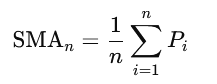

Donde:

  * PiPi​ es el precio en el periodo i.
  * nn es el número de periodos.


**Implementación de las SMA en el Código**

En este caso, tenemos dos medias móviles simples que vamos a calcular:

  **SMA corto (10 periodos):** Esta media móvil se usa para representar la tendencia a corto plazo de los precios.
  
  **SMA largo (50 periodos):** Esta media móvil se usa para representar la tendencia a largo plazo de los precios.

Ambas medias móviles se calculan utilizando la función rolling(window=n).mean(), que calcula la media móvil con una ventana de tamaño n para los precios de cierre.

In [27]:
def calcular_sma(df_bitcoin_limpio):
    """
    Calcula las medias móviles simples (SMA) de corto y largo plazo para el DataFrame de Bitcoin.

    Args:
    - df_bitcoin_limpio (DataFrame): DataFrame con los precios de Bitcoin.

    Returns:
    - df_bitcoin_limpio (DataFrame): DataFrame con las columnas de SMA calculadas.
    """

    # Calcular la SMA de corto plazo (por ejemplo, 10 periodos)
    df_bitcoin_limpio['SMA_corto'] = df_bitcoin_limpio['Close'].rolling(window=10).mean()

    # Calcular la SMA de largo plazo (por ejemplo, 50 periodos)
    df_bitcoin_limpio['SMA_largo'] = df_bitcoin_limpio['Close'].rolling(window=50).mean()

    return df_bitcoin_limpio

In [28]:
def graficar_sma_plotly(df_bitcoin_limpio):
    """
    Grafica el precio de cierre de Bitcoin junto con las medias móviles simples (SMA) usando Plotly.

    Args:
    - df_bitcoin_limpio (DataFrame): DataFrame con las columnas de 'Close', 'SMA_corto' y 'SMA_largo'.
    """

    # Crear la figura
    fig = go.Figure()

    # Agregar el gráfico de línea para el precio de cierre (Close)
    fig.add_trace(go.Scatter(x=df_bitcoin_limpio.index,
                             y=df_bitcoin_limpio['Close'],
                             mode='lines',
                             name='Precio de Cierre',
                             line=dict(color='blue', width=2)))

    # Agregar la SMA corta (10 periodos)
    fig.add_trace(go.Scatter(x=df_bitcoin_limpio.index,
                             y=df_bitcoin_limpio['SMA_corto'],
                             mode='lines',
                             name='SMA Corto (10 períodos)',
                             line=dict(color='red', dash='dash', width=2)))

    # Agregar la SMA larga (50 periodos)
    fig.add_trace(go.Scatter(x=df_bitcoin_limpio.index,
                             y=df_bitcoin_limpio['SMA_largo'],
                             mode='lines',
                             name='SMA Largo (50 períodos)',
                             line=dict(color='green', dash='dash', width=2)))

    # Configurar el layout
    fig.update_layout(
        title='Precio de Cierre de Bitcoin y Medias Móviles Simples (SMA)',
        xaxis_title='Fecha',
        yaxis_title='Precio de Cierre',
        template='plotly_dark',  # Estilo visual oscuro
        legend=dict(x=0.01, y=0.99, traceorder='normal'),
        hovermode='x unified',  # Mostrar los valores al pasar por encima del gráfico
        showlegend=True
    )

    # Mostrar el gráfico
    fig.show()

# Ejemplo de uso
df_bitcoin_limpio = calcular_sma(df_bitcoin_limpio)
graficar_sma_plotly(df_bitcoin_limpio)


#**4. Tomar decisiones**

In [29]:
def tomar_decisiones():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, color

    # Obtener las últimas SMA corta y SMA larga calculadas previamente
    SMA_corta = df_bitcoin_limpio['SMA_corto'].iloc[-1]  # Último valor de la SMA corta
    SMA_larga = df_bitcoin_limpio['SMA_largo'].iloc[-1]  # Último valor de la SMA larga

    # Obtener el precio actual (último valor en la columna 'Close')
    precio_actual = df_bitcoin_limpio['Close'].iloc[-1]

    # Condición para "Comprar"
    if SMA_corta > SMA_larga and tendencia == 'alta':
        algoritmo_decision = "Comprar"
        color = "#00FF00"  # Verde para comprar

    # Condición para "Vender"
    elif SMA_corta < SMA_larga and tendencia == 'baja':
        algoritmo_decision = "Vender"
        color = "#DC143C"  # Rojo para vender

    # Condición para "Mantener"
    else:
        algoritmo_decision = "Mantener"
        color = "#000000"  # Negro para mantener

    # Imprimir la decisión tomada y otros valores
    print("************************************************************")
    print(f"Decisión Tomada: {algoritmo_decision}")
    print(f"Precio Actual: {precio_actual}")
    print(f"Tendencia: {tendencia}")
    print(f"Media Bitcoin: {media_bitcoin}")
    print(f"Algoritmo de Decisión: {algoritmo_decision}")
    print(f"Color de la Señal: {color}")
    print("************************************************************")

# Llamar a la función para tomar decisiones
tomar_decisiones()

************************************************************
Decisión Tomada: Mantener
Precio Actual: 103808.015625
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Mantener
Color de la Señal: #000000
************************************************************


In [30]:
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Obtener las últimas SMA corta y SMA larga calculadas previamente
    SMA_corta = df_bitcoin_limpio['SMA_corto'].iloc[-1]  # Último valor de la SMA corta
    SMA_larga = df_bitcoin_limpio['SMA_largo'].iloc[-1]  # Último valor de la SMA larga

    # Obtener el precio actual (último valor en la columna 'Close')
    precio_actual = df_bitcoin_limpio['Close'].iloc[-1]

    # Obtener el precio más alto y el precio más bajo
    precio_maximo = df_bitcoin_limpio['High'].max()
    precio_minimo = df_bitcoin_limpio['Low'].min()

    # Definir los colores para las señales
    if algoritmo_decision == 'Comprar':
        color_decision = '#00FF00'  # Verde para comprar
    elif algoritmo_decision == 'Vender':
        color_decision = '#DC143C'  # Rojo para vender
    else:
        color_decision = '#00FF00'  # Verde para mantener

    # Crear el gráfico
    fig = go.Figure()

    # Trazar el gráfico de precios (Close)
    fig.add_trace(go.Candlestick(
        x=df_bitcoin_limpio.index,
        open=df_bitcoin_limpio['Open'],
        high=df_bitcoin_limpio['High'],
        low=df_bitcoin_limpio['Low'],
        close=df_bitcoin_limpio['Close'],
        name='Precio de Cierre',
        increasing_line_color='green',
        decreasing_line_color='red'
    ))

    # Trazar las SMA (media móvil corta y larga)
    fig.add_trace(go.Scatter(
        x=df_bitcoin_limpio.index,
        y=df_bitcoin_limpio['SMA_corto'],
        mode='lines',
        name='SMA Corta',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=df_bitcoin_limpio.index,
        y=df_bitcoin_limpio['SMA_largo'],
        mode='lines',
        name='SMA Larga',
        line=dict(color='orange')
    ))

    # Resaltar la última señal (decisión tomada)
    if algoritmo_decision == 'Comprar':
        fig.add_trace(go.Scatter(
            x=[df_bitcoin_limpio.index[-1]],
            y=[precio_actual],
            mode='markers+text',
            name='Señal de Compra',
            marker=dict(color=color_decision, size=10),
            text=['Comprar'],
            textposition='top center'
        ))
    elif algoritmo_decision == 'Vender':
        fig.add_trace(go.Scatter(
            x=[df_bitcoin_limpio.index[-1]],
            y=[precio_actual],
            mode='markers+text',
            name='Señal de Venta',
            marker=dict(color=color_decision, size=10),
            text=['Vender'],
            textposition='top center'
        ))
    else:
        fig.add_trace(go.Scatter(
            x=[df_bitcoin_limpio.index[-1]],
            y=[precio_actual],
            mode='markers+text',
            name='Señal de Mantener',
            marker=dict(color=color_decision, size=20, symbol='circle'),
            text=['Mantener'],
            textposition='top center'
        ))

    # Añadir anotaciones para el precio más alto, el precio más bajo y el precio actual
    fig.add_annotation(
        x=df_bitcoin_limpio['High'].idxmax(),
        y=precio_maximo,
        text=f"Máximo: {precio_maximo}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        bgcolor="black",
        font=dict(color="white")
    )

    fig.add_annotation(
        x=df_bitcoin_limpio['Low'].idxmin(),
        y=precio_minimo,
        text=f"Mínimo: {precio_minimo}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=40,
        bgcolor="black",
        font=dict(color="white")
    )

    fig.add_annotation(
        x=df_bitcoin_limpio.index[-1],
        y=precio_actual,
        text=f"Actual: {precio_actual}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        bgcolor="black",
        font=dict(color="white")
    )

    # Título y etiquetas del gráfico
    fig.update_layout(
        title="Gráfico de Precio de Bitcoin con Decisión de Trading",
        xaxis_title="Fecha",
        yaxis_title="Precio de Cierre",
        template="plotly_dark"
    )

    # Mostrar el gráfico
    fig.show()

    # Imprimir detalles de la decisión tomada
    print("************************************************************")
    print(f"Decisión Tomada: {algoritmo_decision}")
    print(f"Precio Actual: {precio_actual}")
    print(f"Tendencia: {tendencia}")
    print(f"Media Bitcoin: {media_bitcoin}")
    print(f"Algoritmo de Decisión: {algoritmo_decision}")
    print(f"Color de la Señal: {color_decision}")
    print("************************************************************")

# Llamar a la función para tomar decisiones y graficar
tomar_decisiones()  # Llamamos a esta función primero para establecer la decisión
visualizacion()  # Luego graficamos los resultados

************************************************************
Decisión Tomada: Mantener
Precio Actual: 103808.015625
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Mantener
Color de la Señal: #000000
************************************************************


************************************************************
Decisión Tomada: Mantener
Precio Actual: 103808.015625
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Mantener
Color de la Señal: #00FF00
************************************************************


# 6. Automatización

In [31]:
from IPython.display import clear_output
import time

In [ ]:
while True:
    clear_output(wait=True)
    print("************************************************************")
    print("Iniciando ciclo de análisis...")
    print("************************************************************")

    # Paso 1: Descargar los datos y extraer el precio actual
    importar_base_bitcoin()
    extraer_tendencias
    # Paso 2: Limpiar los datos
    #limpieza_datos()
    # Paso 3: Calcular las medias móviles
    #calcular_sma()
    # Paso 4: Tomar la decisión de compra/venta
    tomar_decisiones()
    # Paso 5: Graficar las tendencias y señales
    visualizacion()
    # Esperar 5 minutos antes de la siguiente decisión
    print("Esperando 5 minutos antes de la siguiente decisión...")
    time.sleep(300)

[*********************100%***********************]  1 of 1 completed

************************************************************
Iniciando ciclo de análisis...
************************************************************
************************************************************
Decisión Tomada: Mantener
Precio Actual: 103808.015625
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Mantener
Color de la Señal: #000000
************************************************************


************************************************************
Decisión Tomada: Mantener
Precio Actual: 103808.015625
Tendencia: Bajista
Media Bitcoin: 97024.09
Algoritmo de Decisión: Mantener
Color de la Señal: #00FF00
************************************************************
Esperando 5 minutos antes de la siguiente decisión...
